# HGCAL Detector and Charged pion showering

## Loading the data files

In [1]:
#Importing the reqiured packages
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Opening the root file
file=uproot.open("/Users/priyankar/Desktop/MSc_Project_HEP/ntuple_pi+_100GeV_100keve.root:AllLayers")

In [3]:
file.keys()

['event_n',
 'hit_E',
 'hit_x',
 'hit_y',
 'hit_z',
 'hit_l',
 'EElayer_1_totE',
 'EElayer_2_totE',
 'EElayer_3_totE',
 'EElayer_4_totE',
 'EElayer_5_totE',
 'EElayer_6_totE',
 'EElayer_7_totE',
 'EElayer_8_totE',
 'EElayer_9_totE',
 'EElayer_10_totE',
 'EElayer_11_totE',
 'EElayer_12_totE',
 'EElayer_13_totE',
 'EElayer_14_totE',
 'EElayer_15_totE',
 'EElayer_16_totE',
 'EElayer_17_totE',
 'EElayer_18_totE',
 'EElayer_19_totE',
 'EElayer_20_totE',
 'EElayer_21_totE',
 'EElayer_22_totE',
 'EElayer_23_totE',
 'EElayer_24_totE',
 'EElayer_25_totE',
 'EElayer_26_totE',
 'EElayer_27_totE',
 'EElayer_28_totE',
 'HElayer_29_totE',
 'HElayer_30_totE',
 'HElayer_31_totE',
 'HElayer_32_totE',
 'HElayer_33_totE',
 'HElayer_34_totE',
 'HElayer_35_totE',
 'HElayer_36_totE',
 'HElayer_37_totE',
 'HElayer_38_totE',
 'HElayer_39_totE',
 'HElayer_40_totE']

In [4]:
#Opening the cell index file
columns=["index","x","y","z","l"]
s=pd.read_csv("cellIndex.txt",sep=" ",usecols=columns)

In [5]:
s[:133]

,index,x,y,z,l
0,0,0.00000,0.00,13.8625,1
1,1,0.00000,1.12,13.8625,1
2,2,0.00000,-1.12,13.8625,1
3,3,0.00000,2.24,13.8625,1
4,4,0.00000,-2.24,13.8625,1
...,...,...,...,...,...
128,128,-5.81969,-2.24,13.8625,1
129,129,6.78964,0.56,13.8625,1
130,130,6.78964,-0.56,13.8625,1
131,131,-6.78964,0.56,13.8625,1


## Visualizing the layers in HGCAL detectors

Text(0, 0.5, 'y$\\longrightarrow$')

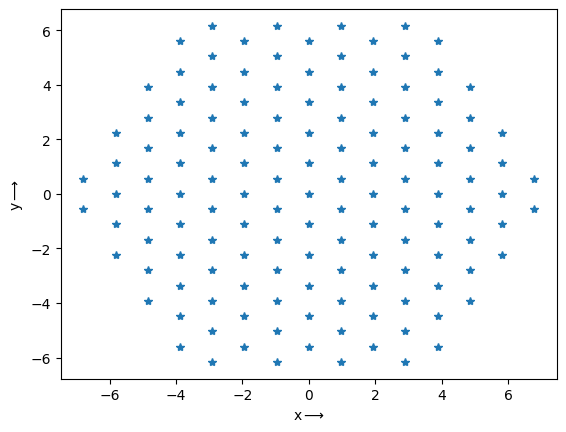

In [6]:
#Visualization of the EE layer
plt.plot(s["x"][:133],s["y"][:133],"*")
plt.xlabel(r"x$\longrightarrow$")
plt.ylabel(r"y$\longrightarrow$")

Text(0, 0.5, 'y$\\longrightarrow$')

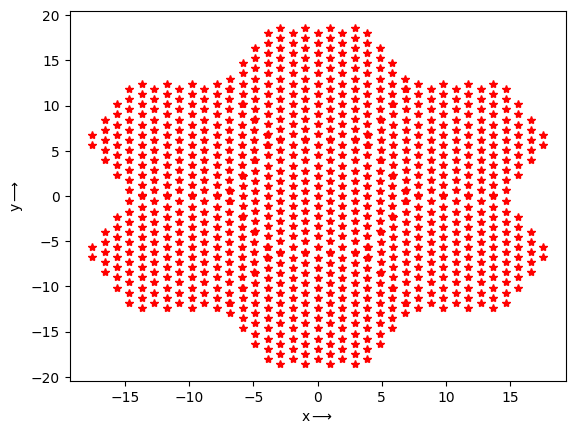

In [7]:
#Visualizing the HE layer.
plt.plot(s["x"][3724:4655],s["y"][3724:4655],"r*")
plt.xlabel(r"x$\longrightarrow$")
plt.ylabel(r"y$\longrightarrow$")

## Visulaizing the data we have from the root file

In [8]:
#Saving the layer, x,y,z,E of the hits into the awkward arrays
hit_l=file["hit_l"].array(library="ak")
hit_x=file["hit_x"].array(library="ak")
hit_y=file["hit_y"].array(library="ak")
hit_z=file["hit_z"].array(library="ak")
hit_E=file["hit_E"].array(library="ak")

In [9]:
#Viewing the arrays
hit_l

<Array [[1, 2, 3, 4, 5, ..., 38, 38, 38, 39], ...] type='100000 * var * int32'>

Here, the hit_l represents the number of hits in each layer for each event. For example: The first event(row wise) shows that "The number 6 is repeated twice". This simply means, *There are two hits in the layer 6 in event 1*

In [10]:
hit_z

<Array [[13.9, 14.8, 16.8, ..., 138, 145], ...] type='100000 * var * float64'>

In [11]:
hit_E

<Array [[9.53e-05, 8.14e-05, ..., 0.000217], ...] type='100000 * var * float64'>

## Longitudinal profile

In [12]:
#Here, we need hit_l, hit_z and hit_E
hit_l

<Array [[1, 2, 3, 4, 5, ..., 38, 38, 38, 39], ...] type='100000 * var * int32'>

In [13]:
hit_z

<Array [[13.9, 14.8, 16.8, ..., 138, 145], ...] type='100000 * var * float64'>

In [14]:
hit_E

<Array [[9.53e-05, 8.14e-05, ..., 0.000217], ...] type='100000 * var * float64'>

Here, we need to calculate firts: the **energy deposited at each layer or each z value, averaged over all events**  

In [15]:
#For a trial- lets try with layer 1
mask=(hit_l==1) #Returns a boolean awkward array
E1=hit_E[mask]
E1 #Generates an awkward array for all hit energies in layer 1 at each event

<Array [[9.53e-05], [8.74e-05], ..., [9.06e-05]] type='100000 * var * float64'>

In [16]:
#Now we need to sum up the total energy at each event for layer 1
E1_s=ak.sum(E1,axis=1) #Sums up horizontally
E1_s

<Array [9.53e-05, 8.74e-05, ..., 0.000353, 9.06e-05] type='100000 * float64'>

In [17]:
#Now, we need to take out the mean
E1_mean=np.mean(E1_s)
E1_mean

0.000580612909545811

The above value is the mean energy deposited at layer 1 averaged over all the events. Now this must be repeated for all the layers. So, we use **a for loop on the layer number**

The above process can be repeated for the z values as well. We will do that now.

In [18]:
#Lets try with layer l=2
mask=(hit_l==2)
z1=hit_z[mask]
z1

<Array [[14.8], [14.8], ..., [14.8], [14.8]] type='100000 * var * float64'>

In [19]:
d=ak.mean(z1,axis=1)
d[0]

14.752499999999998

In [20]:
hit_E_mean=[]#A list that stores the energy deposited at each layer, averaged over all the events.
hit_z_mean=[]
for i in range(50):
    mask=(hit_l==i)
    hit_z_mean.append((ak.mean(hit_z[mask],axis=1))[0])
    hit_E_mean.append(np.mean(ak.sum(hit_E[mask],axis=1)))

Text(0, 0.5, 'hit_E$\\longrightarrow$')

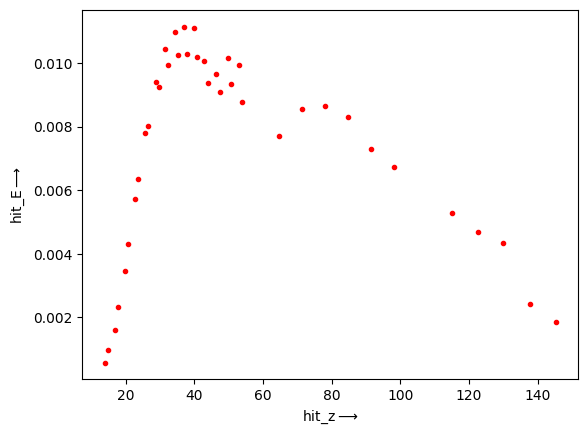

In [21]:
#z_dat=np.linspace(0,160,50)
plt.plot(hit_z_mean,hit_E_mean,'r.')
plt.xlabel(r'hit_z$\longrightarrow$')
plt.ylabel(r'hit_E$\longrightarrow$')

Text(0, 0.5, 'hit_E$\\longrightarrow$')

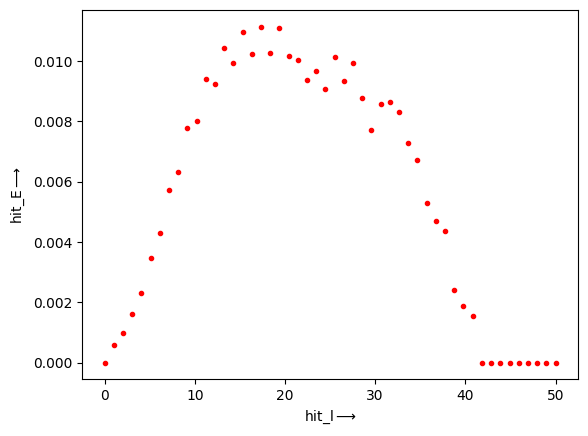

In [22]:
l_dat=np.linspace(0,50,50)
plt.plot(l_dat,hit_E_mean,'r.')
plt.xlabel(r'hit_l$\longrightarrow$')
plt.ylabel(r'hit_E$\longrightarrow$')

## Lateral profile

At the very first thing,we need to read the cell index file. Then, we shall find out the r values of all the cells, followed by finding the r value of the **hit cells**

### Working with the complete hexaboard

In [23]:
#Lets call the cellIndex file
s_EE=s[:133] # The first EE layer
s_HE=s[3724:4655]

In [24]:
s_EE

,index,x,y,z,l
0,0,0.00000,0.00,13.8625,1
1,1,0.00000,1.12,13.8625,1
2,2,0.00000,-1.12,13.8625,1
3,3,0.00000,2.24,13.8625,1
4,4,0.00000,-2.24,13.8625,1
...,...,...,...,...,...
128,128,-5.81969,-2.24,13.8625,1
129,129,6.78964,0.56,13.8625,1
130,130,6.78964,-0.56,13.8625,1
131,131,-6.78964,0.56,13.8625,1


In [25]:
s_HE

,index,x,y,z,l
3724,3724,0.00000,0.00,64.6035,29
3725,3725,0.00000,1.12,64.6035,29
3726,3726,0.00000,-1.12,64.6035,29
3727,3727,0.00000,2.24,64.6035,29
3728,3728,0.00000,-2.24,64.6035,29
...,...,...,...,...,...
4650,4650,4.93634,3.97,64.6035,29
4651,4651,17.54570,6.77,64.6035,29
4652,4652,17.54570,5.65,64.6035,29
4653,4653,3.96640,6.77,64.6035,29


In [26]:
# Calculating the r values for EE layer
s_EE['r']=np.sqrt((s_EE['x'])**2+(s_EE['y'])**2)
s_HE['r']=np.sqrt((s_HE['x'])**2+(s_HE['y'])**2)

/var/folders/51/t3tdf74s4l75c8qpmww2cqkr0000gp/T/ipykernel_10066/55569556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_EE['r']=np.sqrt((s_EE['x'])**2+(s_EE['y'])**2)
/var/folders/51/t3tdf74s4l75c8qpmww2cqkr0000gp/T/ipykernel_10066/55569556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_HE['r']=np.sqrt((s_HE['x'])**2+(s_HE['y'])**2)


In [27]:
s_EE

,index,x,y,z,l,r
0,0,0.00000,0.00,13.8625,1,0.000000
1,1,0.00000,1.12,13.8625,1,1.120000
2,2,0.00000,-1.12,13.8625,1,1.120000
3,3,0.00000,2.24,13.8625,1,2.240000
4,4,0.00000,-2.24,13.8625,1,2.240000
...,...,...,...,...,...,...
128,128,-5.81969,-2.24,13.8625,1,6.235895
129,129,6.78964,0.56,13.8625,1,6.812695
130,130,6.78964,-0.56,13.8625,1,6.812695
131,131,-6.78964,0.56,13.8625,1,6.812695


In [28]:
s_HE

,index,x,y,z,l,r
3724,3724,0.00000,0.00,64.6035,29,0.000000
3725,3725,0.00000,1.12,64.6035,29,1.120000
3726,3726,0.00000,-1.12,64.6035,29,1.120000
3727,3727,0.00000,2.24,64.6035,29,2.240000
3728,3728,0.00000,-2.24,64.6035,29,2.240000
...,...,...,...,...,...,...
4650,4650,4.93634,3.97,64.6035,29,6.334694
4651,4651,17.54570,6.77,64.6035,29,18.806501
4652,4652,17.54570,5.65,64.6035,29,18.432962
4653,4653,3.96640,6.77,64.6035,29,7.846351


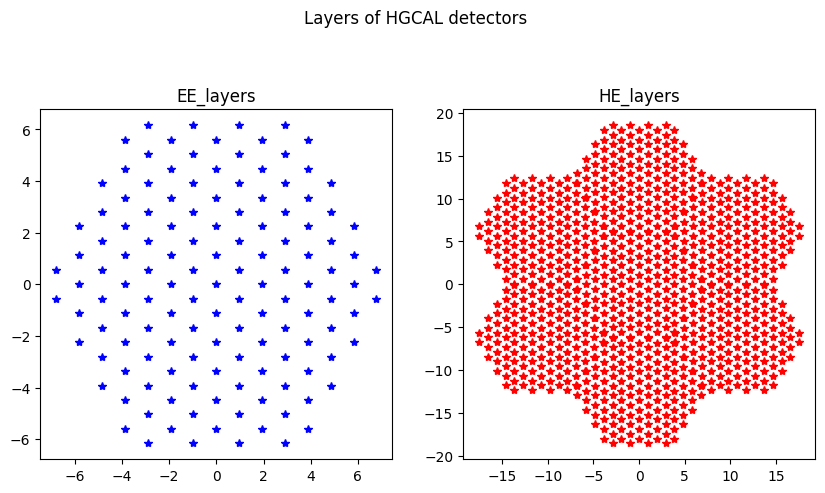

In [29]:
# Show the cells side by side
plt.figure(figsize=(10,10))
plt.suptitle("Layers of HGCAL detectors")
plt.subplot(221)
#plt.plot(s["x"][:133],s["y"][:133],"*")
plt.title("EE_layers")
plt.plot(s_EE["x"],s_EE["y"],"b*")
plt.subplot(222)
plt.title("HE_layers")
plt.plot(s_HE["x"],s_HE["y"],"r*")

Now, we are to find **unique r values**, for both the EE and HE layers

In [30]:
r_EE=np.unique(s_EE["r"].values)
r_HE=np.unique(s_HE["r"].values)

In [31]:
r_EE

array([0.        , 1.11999961, 1.12      , 1.93989668, 1.9399    ,
       2.24      , 2.24000268, 2.96324132, 2.96324349, 2.96324603,
       3.36      , 3.36000402, 3.87979   , 3.87979536, 4.03821377,
       4.03821732, 4.03822077, 4.4799967 , 4.48      , 4.88196457,
       4.88196805, 4.88196958, 5.1324819 , 5.13248264, 5.13248469,
       5.59999804, 5.6       , 5.81969   , 5.81969304, 5.92648044,
       5.92648224, 5.92648395, 6.23589433, 6.23589542, 6.23589602,
       6.81269186, 6.81269487, 6.81269602])

In [32]:
r_HE

array([ 0.        ,  1.11999961,  1.12      ,  1.93989668,  1.9399    ,
        2.24      ,  2.24000268,  2.96324132,  2.96324349,  2.96324603,
        3.36      ,  3.36000402,  3.87979   ,  3.87979536,  4.03821377,
        4.03821732,  4.03822077,  4.4799967 ,  4.48      ,  4.88196457,
        4.88196805,  4.88196958,  5.1324819 ,  5.13248264,  5.13248469,
        5.59999804,  5.6       ,  5.81969   ,  5.81969304,  5.92648044,
        5.92648224,  5.92648395,  6.23589433,  6.23589542,  6.23589602,
        6.33469436,  6.33469506,  6.33469803,  6.81269186,  6.81269487,
        6.81269602,  6.81999718,  6.82      ,  6.90324391,  6.90324757,
        6.90324771,  7.09052555,  7.09052724,  7.09052974,  7.44346435,
        7.44346536,  7.44346688,  7.84634759,  7.84634931,  7.84635132,
        7.93294098,  7.93294381,  7.93294567,  7.93999852,  7.94      ,
        8.17354033,  8.17354253,  8.17354342,  8.55516081,  8.55516204,
        8.55516213,  8.83721407,  8.83721508,  8.83721814,  8.98

### Working with the hit positions

We now need to calculate the **hit_r**= the radial distance at which the hits have occured

In [33]:
hit_r=np.sqrt(hit_x**2+hit_y**2)

In [34]:
hit_r

<Array [[0, 0, 0, 0, ..., 5.13, 5.13, 5.93], ...] type='100000 * var * float64'>

In [35]:
hitr=hit_r[0]
np.digitize(hitr,r_EE)-1

<Array [0, 0, 0, 0, 0, 0, 24, ..., 37, 37, 15, 24, 24, 30] type='404 * int64'>